# Optimización por cúmulo de partículas

***

La optimización por cúmulo de partículas es una clase de algoritmo evolutivo y metaheurística para búsqueda en espacios de soluciones candidatas. En este método de optimización se tiene una función a optimizar mediante la mejora de soluciones candidatas. Estas soluciones se denominan partículas, y se mueven a través del espacio de búsqueda siguiendo un modelo matemático que toma en cuenta la posición y velocidad de la partícula.

Una partícula $X$ se mueve en un espacio $k$-dimensional para optimizar una función. En cada iteración del algoritmo, la partícula se desplazará en dirección de la velocidad que la corresponde. La velocidad de la partícula es el vector resultante de tres distintas velocidades:
- Un factor de momento, por el cual se preserva la velocidad en la iteración anterior.
- Un factor cognitivo, por el cual la partícula se ve atraída hacia su mejor posición histórica.
- Un factor social, por el cual la partícula se ve atraída hacia la mejor posición histórica de todo el cúmulo.

La influencia de cada uno de estos factores a su vez se ve determinada por una serie de hiperparámetros y un proceso aleatorio.

## Formulación matemática

***

Matemáticamente, el algoritmo de optimización por cúmulo de partículas se puede formular de la siguiente manera:

Existirán un conjunto de $n$ partículas, $\mathbf{X} = [X_1, ... X_n]$.

Cada partícula $X_i$ es un vector en el espacio de búsqueda $k$-dimensional. $X_i = [X_{i1}, X_{i2}, ...,  X_{ik}]$. Cada partícula $X_i$ será inicializada en un punto aleatorio del espacio de búsqueda.

Dado que cada partícula se desplazará conforme pase el tiempo, será conveniente indexarla como $X_i(t)$ para referirse a la posición de la partícula $X_i$ (la solución que esta codifica al problema de optimización) en el tiempo $t$.


Para cada partícula $X_i$ en el tiempo $t$ se realizará el siguiente proceso:

1. Se calcula el desempeño de la solución $X_i(t)$, $m\big(X_i(t)\big)$.
2. Se almacenarán los siguientes datos:
    - La mejor solución global histórica, $Y_b$.
    - La métrica asociada a la mejor solución global, $m\big(Y_b\big)$.
    - La mejor solución histórica de la partícula $X_i$, $Y_{i}$.
    - La métrica asociada a la mejor solución histórica de la partícula $X_i$, $m\big(Y_{i}\big)$.
3. Se obtendrá la velocidad de la partícula $X_i(t)$, $V_i(t)$ utilizando la siguiente fórmula:

$$V_{i}(t) = \nu \cdot V_{i}(t-1) + c_1 \cdot r_1 \cdot [Y_{i} - X_{i}(t)] + c_2 \cdot r_2 \cdot [Y_{b} - X_{i}(t)]$$


En donde:
- $r_1$ y $r_2$ son V.A.I.I.D. $\sim U_{[0,1]}$
- $\nu$, $c_1$ y $c_2$ son hiperparámetros constantes al algoritmo.


4. Se desplazará la partícula a una nueva posición para el tiempo $t+1$:

$$X_i(t+1) = X_i(t) + V_{i}(t)$$

5. Si se detecta la convergencia o pasan las iteraciones deseadas del algoritmo, este se detiene. De lo contrario, se procede a la iteración en el tiempo $t+1$, volviendo a iniciar del paso 1.

El poder de este método de optimización proviene de no asumir nada sobre la función de optimización y del cálculo de la velocidad:

$$V_{i}(t) = \nu \cdot V_{i}(t-1) + c_1 \cdot r_1 \cdot [Y_{i} - X_{i}(t)] + c_2 \cdot r_2 \cdot [Y_{b} - X_{i}(t)]$$

En este caso, a $[Y_{i} - X_{i}(t)]$ se le conoce como el factor cognitivo y a $[Y_{b} - X_{i}(t)]$ se le conoce como el factor social. Ambos pueden influenciar el desplazamiento en mayor o menor medida por medio de los hiperparámetros $c_1$ y $c_2$. De igual manera, el factor aleatorio en cada uno en conjunto al factor de momento permite una exploración más flexible del espacio de búsqueda.

Aunque este método de optimización tiene múltiples ventajas, no asegura encontrar una solución óptima en ningún momento. De igual manera, esta formulación tiene la desventaja de que solo funciona para espacios $k$-dimensionales contínuos. Para el problema que se tratará en este trabajo, se definirá una variación de este mismo algoritmo.

# Optimización por cúmulo de partículas para espacios binarios

***

La optimización en espacios binarios $k$-dimensionales suele tratarse en problemas que lidian con la inclusión o exclusión de elementos para la generación de soluciones. Desgraciadamente el algoritmo de cúmulo de partículas pierde sentido en este tipo de espacios debido a que no existe un equivalente directo de la velocidad para espacios binarios.

En 1997 J. Kennedy y R.C. Eberhart propusieron la versión discreta binaria del algoritmo de optimización por cúmulo de partículas. Este se basa en una analogía para la distancia y velocidad en espacios binairos.

En un espacio binario, una partícula se puede mover más lejos o cerca de su posición actual dependiendo del número de bits que se invierten. Entonces, la velocidad de la partícula se puede pensar como la distancia de Hamming entre dos iteraciones de la misma $X_i(t)$ y $X_i(t+1)$.

En este espacio, se puede definir la velocidad para cada una de las $k$ componentes como una probabilidad de que un bit se encuentre en 0 o 1. Por ejemplo, si la mejor posición de la partícula en su coordenada $i$ es 0, entonces $[Y_{i} - X_{i}(t)]$ en la posición $i$ se puede calcular como $+1$, $0$, o $-1$. Estas distancias en el componente $i$ a su vez se pueden usar para aumentar o disminuir la probabilidad de transición en esta componente.

Si no se modifica la fórmula para la velocidad:

$$V_{i}(t) = \nu \cdot V_{i}(t-1) + c_1 \cdot r._1 \cdot [Y_{i} - X_{i}(t)] + c_2 \cdot r_2 \cdot [Y_{b} - X_{i}(t)]$$

Esta sigue teniendo sentido si consideramos que las posiciones en cada componente de la partícula solo pueden ser 0 y 1. Como la velocidad debe ser una probabilidad entre 0 y 1, se aplica la función sigmoide a la velocidad y se utiliza la siguiente regla de decisión en cada componente $j$ de la partícula:

- Si $\tilde{r} < S\big(V_{ij}(t)\big)$, $X_ij(t+1) = 1$
- En el caso contrario, $X_ij(t+1) = 0$.

Donde $\tilde{r} \sim U_{[0,1]}$.

De esta forma, el algoritmo queda de la siguiente manera:

## Algoritmo

***

Para cada partícula $X_i$ en el tiempo $t$ se realizará el siguiente proceso:

1. Se calcula el desempeño de la solución $X_i(t)$, $m\big(X_i(t)\big)$.
2. Se almacenarán los siguientes datos:
    - La mejor solución global histórica, $Y_b$.
    - La métrica asociada a la mejor solución global, $m\big(Y_b\big)$.
    - La mejor solución histórica de la partícula $X_i$, $Y_{i}$.
    - La métrica asociada a la mejor solución histórica de la partícula $X_i$, $m\big(Y_{i}\big)$.
3. Se obtendrá la velocidad de la partícula $X_i(t)$, $V_i(t)$ utilizando la siguiente fórmula, en cada componente $j \in [1,k]$:

$$V_{ij}(t) = \nu \cdot V_{ij}(t-1) + c_1 \cdot r_1 \cdot [Y_{ij} - X_{ij}(t)] + c_2 \cdot r_2 \cdot [Y_{bj} - X_{ij}(t)]$$


En donde:
- $r_1$ y $r_2$ son V.A.I.I.D. $\sim U_{[0,1]}$
- $\nu$, $c_1$ y $c_2$ son hiperparámetros constantes al algoritmo.


4. Se desplazará la partícula a una nueva posición para el tiempo $t+1$ de la siguiente forma:

$$X_{ij}(t+1) = 
\begin{cases} 
      0 & \tilde{r} > S(V_{ij}(t)) \\
      1 & \tilde{r} \leq S(V_{ij}(t))
\end{cases}
$$

En donde:
- $\tilde{r}$ $\sim U_{[0,1]}$
- $S$ es la función sigmoide.

5. Si se detecta la convergencia o pasan las iteraciones deseadas del algoritmo, este se detiene. De lo contrario, se procede a la iteración en el tiempo $t+1$, volviendo a iniciar del paso 1.

# Implementación ejemplo

Para ejemplificar el uso del algoritmo de cúmulo de partículas binario se hará una implementación sencilla antes de proceder al tema principal del trabajo.

In [1]:
#Paquetes necesarios para ejecutar este documento
using Pkg
Pkg.add("MetaGraphs")
Pkg.add("GraphPlot")
Pkg.add("LightGraphs")
Pkg.add("Colors")
Pkg.add("CUDA")
Pkg.add("JuMP")
Pkg.add("GLPK")

In [2]:
using LightGraphs, MetaGraphs, GraphPlot, Colors, CUDA, JuMP, GLPK

In [3]:
k = 10 #El número de dimensiones del espacio de búsqueda binario
n = 200; #El número de particulas

200

In [4]:
function random_particle(k) #Se inicializa una partícula aleatoria
   rand(Bool, k)
end;

x = random_particle(k)

10-element Vector{Bool}:
 1
 0
 1
 1
 0
 0
 0
 0
 0
 1

In [5]:
function random_particles(k, n) #Se inicializan n partículas aleatorias
    rand(Bool, (n,k))
end;

X = random_particles(k, n)

200×10 Matrix{Bool}:
 0  1  1  1  1  0  1  0  0  1
 1  1  0  1  0  0  0  0  1  0
 1  1  1  0  0  0  0  1  1  1
 1  1  1  1  1  1  1  1  0  1
 0  1  0  0  1  0  1  1  0  0
 0  1  0  1  0  0  0  0  1  1
 0  1  0  1  1  1  0  0  1  1
 1  0  0  1  0  1  0  1  1  1
 0  1  0  1  0  0  0  1  0  1
 1  0  0  1  1  0  0  0  1  0
 1  0  1  1  1  0  0  0  1  1
 0  1  1  0  0  0  1  0  0  1
 0  0  0  1  0  1  0  1  0  0
 ⋮              ⋮           
 1  1  1  0  0  0  0  1  1  1
 0  0  0  0  1  1  0  0  0  0
 1  0  0  1  0  1  1  0  1  1
 0  0  1  1  1  1  0  1  0  0
 0  0  1  0  1  0  1  0  1  0
 0  1  1  0  0  0  1  0  1  1
 1  0  0  0  1  0  1  0  0  1
 0  1  1  1  0  1  1  1  0  1
 0  1  1  1  0  0  0  1  0  0
 1  0  1  0  0  1  0  1  0  1
 1  0  0  1  1  1  0  0  0  0
 0  1  1  0  0  0  0  1  0  0

In [6]:
# Métrica de prueba para el espacio binario.
# En este ejemplo se buscará maximizar la misma.
# Obviamente la solución óptima es [1 1 0 0 1 1 1 0 0 1]
function metric(A)
    [2.0 0.3 -1.0 -4.0 5.0 7.0 60.0 -1.0 -1000.0 9.0] * A
end;

In [7]:
# Cálculo de la métrica para las n partículas
M = mapslices(metric, X; dims=2)

200×1 Matrix{Float64}:
    69.3
 -1001.7
  -990.7
    77.3
    64.3
  -994.7
  -982.7
  -987.0
     4.3
  -997.0
  -989.0
    68.3
     2.0
     ⋮
  -990.7
    12.0
  -926.0
     6.0
  -936.0
  -931.7
    76.0
    70.3
    -5.7
    16.0
    10.0
    -1.7

In [8]:
#Inicialización de las mejores soluciones
Y = X

200×10 Matrix{Bool}:
 0  1  1  1  1  0  1  0  0  1
 1  1  0  1  0  0  0  0  1  0
 1  1  1  0  0  0  0  1  1  1
 1  1  1  1  1  1  1  1  0  1
 0  1  0  0  1  0  1  1  0  0
 0  1  0  1  0  0  0  0  1  1
 0  1  0  1  1  1  0  0  1  1
 1  0  0  1  0  1  0  1  1  1
 0  1  0  1  0  0  0  1  0  1
 1  0  0  1  1  0  0  0  1  0
 1  0  1  1  1  0  0  0  1  1
 0  1  1  0  0  0  1  0  0  1
 0  0  0  1  0  1  0  1  0  0
 ⋮              ⋮           
 1  1  1  0  0  0  0  1  1  1
 0  0  0  0  1  1  0  0  0  0
 1  0  0  1  0  1  1  0  1  1
 0  0  1  1  1  1  0  1  0  0
 0  0  1  0  1  0  1  0  1  0
 0  1  1  0  0  0  1  0  1  1
 1  0  0  0  1  0  1  0  0  1
 0  1  1  1  0  1  1  1  0  1
 0  1  1  1  0  0  0  1  0  0
 1  0  1  0  0  1  0  1  0  1
 1  0  0  1  1  1  0  0  0  0
 0  1  1  0  0  0  0  1  0  0

In [9]:
# Velocidades en la iteración previa inician en cero.
V = zeros((n,k))

200×10 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [10]:
# Definición de la función sigmoide
sigmoid(z::Real) = 1.0 / (1.0 + exp(-z));

In [11]:
#Hiperparámetros del algoritmo

iterations = 100 #Cuantas iteraciones realizar
ν = 0.8 #Ponderación para el momento de la velocidad
c_1 = 10 #Ponderación para el factor cognitivo de la velocidad
c_2 = 10; #Ponderación para el factor social de la velocidad

10

In [12]:
Y_b = NaN
M_b = NaN

for i in 1:iterations
    
    #Obtengo las métricas de las partículas
    M_t = mapslices(metric, X; dims=2)
    
    #M = metric(X, n, k, n_s, n_p, n_d, n_c, W_s, W_p, W_d, W_c, f_p, f_d, u_s_p, u_p_d, u_d_c)
    
    #En qué partículas existió mejora
    improvement = M_t .> M

    #Actualizo las mejores métricas personales
    M[improvement] = M_t[improvement]

    #Actualizo las mejores soluciones personales
    Y[improvement[:],:] = X[improvement[:],:]
    
    #Encuentro la mejor métrica global así como su índice en M
    M_b, M_bidx = findmax(M)
    
    #Encuentro la mejor solución global
    Y_b = Y[M_bidx[2], :]

    #Encuentro la velocidad (probabilidad de cero o uno)
    V = (ν * V) + (c_1 * rand(Float64, (n,k)) .* (Y - X)) + (c_2 * rand(Float64, (n,k)) .* (Y_b' .- X))

    #Propongo nuevos candidatos
    X = (rand(Float64, (n,k)) .< sigmoid.(V))
    #Cada 10 iteraciones imprimo la métrica de la mejor solución
    if i % 10 == 1
        print(M_b)
        print("\n")
    end
end

82.0
83.3
83.3
83.3
83.3
83.3
83.3
83.3
83.3
83.3


In [13]:
#La mejor solución encontrada
Y_b

10-element Vector{Bool}:
 1
 1
 0
 0
 1
 1
 1
 0
 0
 1

Como se podrá recordar, la métrica de prueba tenía como mejor solución por diseño al vector $[1 1 0 0 1 1 1 0 0 1]$. El algoritmo la encontró con relativamente pocas iteraciones.

In [14]:
#La métrica asociada a la mejor solución
M_b

83.3

# Problema a tratar

En este trabajo se buscará realizar una optimización de cadenas de suministros de múltiples etapas tal como se propone en la tesis adjunta. En una cadena de suministro existen productores ($S$), plantas ($P$), distribuidores ($D$) y consumidores ($C$). La finalidad del sistema es realizar el transporte entre etapas (de productores a plantas, plantas a distribuidores y distribuidores a consumidores) de tal manera que se pueda cubrir la demanda compuesta de todos los consumidores. 

Un problema de optimización común en ese tipo de sistemas es la apertura y cierre de plantas y centros de distribución. La cobertura de la demana de los clientes en muchos casos no requiere de la operación de todas las plantas y centros de distribución, y se puede generar una reducción de costos de toda la operación si se seleccionan correctamente las instalaciones que deben estar involucradas en una operación.

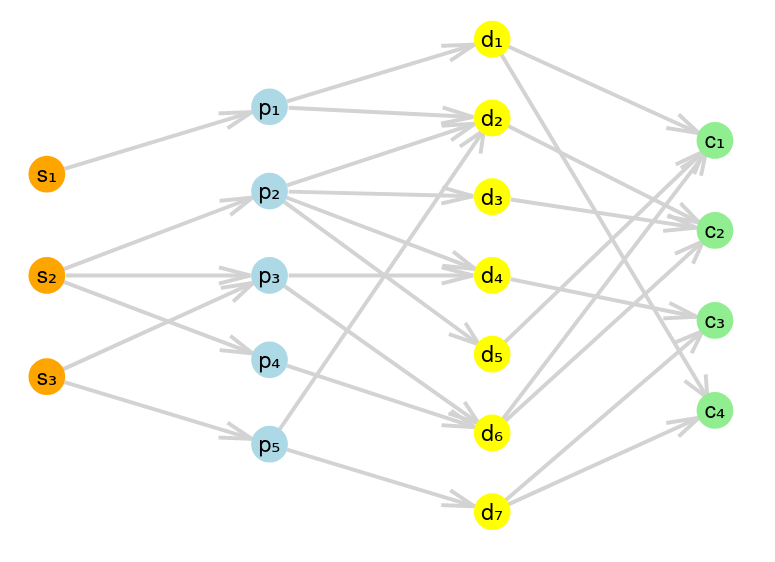

La resolución de este problema se puede realizar mediante una combinación del algoritmo de cúmulo de partículas en espacios binarios y programación lineal. El cúmulo de partículas se utilizará para proponer y generar la evolución de propuestas topológicas del sistema. Por otra parte, la métrica de costo será calculada por medio de optimización por programación lineal.

A continuación se describe el planteamiento y funcionamiento de la solución:

## Parte evolutiva

***

En una cadena de suministro multietapa se puede realizar la apertura y cierre de plantas y distribuidores con la finalidad de minimizar costos mientras se cubre la demanda de los clientes. Una solución primero se planteará como una partícula binaria con $k = n(p) + n(d)$ dimensiones, donde existe un bit que representa la apertura o cierre de una instalación. El algoritmo de cúmulo de partículas se encargará de generar topologías que puedan resolver el problema, y de hacer que el cúmulo evolucione hacia puntos más óptimos.

#### Restricciones:
 - Abrir al menos una planta.
 - Abrir al menos un distribuidor.
 - Existen $Mn(p)$ plantas máximas que se pueden abrir.
 - Existen $Mn(d)$ distribuidores máximos que se pueden abrir.
 - La capacidad total de las plantas abiertas debe ser mayor o igual a la demanda de los consumidores.
 - La capacidad total de los distribuidores abiertos debe ser mayor o igual a la demanda de los consumidores.
 
Las cuatro primeras restricciones se solucionan volteando bits aleatoriamente en la partícula (en la parte correspondiente a la restricción violada, por ejemplo aleatoriamente poniendo bits en cero para la parte de distribuidores si se están abriendo más de los permitidos).
 
 Por otro lado, si alguna de las últimas dos restricciones se incumple, la solución se considera **inválida**. A esta partícula se le aplica una penalización que consiste en no calcular su desempeño en el problema y directamente se le asigna un valor muy alto en la misma.

## Solución por programación lineal

***

Posterior a la generación de partículas que en teoría pueden resolver el problema, se realiza una optimización para minimizar el costo de toda la operación.

#### Minimización:
 - Se desea minimizar el costo total de la operación, definido como el costo fijo de operación de las instalaciones abiertas, sumado a la cantidad de producto que fluye entre instalaciones multiplicada por el costo unitario de este transporte.
 - En toda instalación debe entrar y salir la misma cantidad de producto.
 - Ninguna instalación debe exceder su capacidad.
 - A cada cliente debe llegar la cantidad exacta de producto que este demanda.

Las restricciones anteriores son planteadas como un problema de programación lineal, en el cual se buscan las cantidades de producto que fluyen entre cada instalación de la cadena de suministro. La salida no se basa en estas cantidades, sino que simplemente se requiere encontrar el mínimo costo asociado a la topología.

## Datos a utilizar

***

En este caso se utilizarán los siguientes datos en el algoritmo:

$S$: $\{s_1, s_2, s_3\}$, es la etapa de proveedores $S$.

$P$: $\{p_1, p_2, p_3, p_4, p_5\}$, es la etapa de plantas $P$.

$D$: $\{d_1, d_2, d_3, d_4, d_5\}$, es la etapa de distribuidores $D$.

$C$: $\{c_1, c_2, c_3, c_4\}$, es la etapa de consumidores $C$.

$W(\xi)$: es la capacidad de $\xi, \forall \xi \in S \cup P \cup D$; o la demanda si $\xi \in C$, donde



$$\newcommand\T{\Rule{0pt}{1em}{.3em}}
\begin{array}{l|llll}
\hline
i & W(s_i) & W(p_i) & W(d_i) & W(c_i) \\ \hline
1          & 500              & 400              & 530              & 460     \\
2          & 650              & 550              & 590              & 330     \\
3          & 390              & 490              & 400              & 450     \\
4          &                  & 300              & 370              & 300     \\
5          &                  & 500              & 580              &         \\ \hline
\end{array}$$

$$
f: =
\begin{pmatrix}
f_{p1} & f_{d1}\\
f_{p2} & f_{d2}\\
\vdots & \vdots\\
f_{p5} & f_{d5}
\end{pmatrix} =
\begin{pmatrix}
1800 & 1000\\
900 & 900\\
2100 & 1600\\
1100 & 1500\\
900 & 1400
\end{pmatrix} \text{  costo fijo de mantener en operación las instalaciones de las etapas }P \text{ y }D
$$

$$
u_{SP}: =
\begin{pmatrix}
u_{s1p1} & u_{s1p2} & \dots & u_{s1p5}\\
u_{s2p1} & u_{s2p2} & \dots & u_{s2p5}\\
u_{s3p1} & u_{s3p2} & \dots & u_{s3p5}\\
\end{pmatrix} =
\begin{pmatrix}
5 & 6 & 4 & 7 & 5\\
6 & 5 & 6 & 6 & 8\\
7 & 6 & 3 & 9 & 6
\end{pmatrix} \text{  costo unitario de transporte entre las etapas }S \text{ y }P
$$

$$
u_{PD}: =
\begin{pmatrix}
u_{p1d1} & u_{p1d2} & \dots & u_{p1d5}\\
u_{p2d1} & u_{p2d2} & \dots & u_{p2d5}\\
\vdots & \vdots & \ddots & \vdots\\
u_{p5d1} & u_{p5d2} & \dots & u_{p5d5}
\end{pmatrix} =
\begin{pmatrix}
5 & 8 & 4 & 3 & 5\\
8 & 7 & 8 & 6 & 8\\
4 & 7 & 4 & 5 & 4\\
3 & 5 & 3 & 5 & 3\\
5 & 6 & 6 & 8 & 3
\end{pmatrix} \text{  costo unitario de transporte entre las etapas }P \text{ y }D
$$

$$
u_{DC}: =
\begin{pmatrix}
u_{d1c1} & u_{d1c2} & u_{d1c3} & u_{d1c4}\\
u_{d2c1} & u_{d2c2} & u_{d2c3} & u_{d2c4}\\
\vdots & \vdots & \vdots & \vdots\\
u_{d5c1} & u_{d5c2} & u_{d5c3} & u_{d5c4}
\end{pmatrix} =
\begin{pmatrix}
7 & 4 & 5 & 6\\
5 & 4 & 6 & 7\\
7 & 5 & 3 & 6\\
3 & 5 & 6 & 4\\
4 & 6 & 5 & 7
\end{pmatrix} \text{  costo unitario de transporte entre las etapas }D \text{ y }C
$$

$$
P_{max}: = 4 \text{ cantidad máxima de vértices en }P\text{ permitidos para abrir,}
$$
$$
D_{max}: = 4 \text{ cantidad máxima de vértices en }D\text{ permitidos para abrir.}
$$

Si se desea conocer la fomulación de las restricciones en forma matricial, se invita a revisar la tesis en la que se basó el trabajo. El código y resultados de la simulación se mostrarán a continuación:

In [3]:
#Número de elementos por etapa
n_s = 3
n_p = 5
n_d = 5
n_c = 4

4

In [4]:
#Capacidades
W_s = [500; 650; 390][:,:] #Capacidad de productor
W_p = [400; 550; 490; 300; 500][:,:]#Capacidad de planta
W_d = [530; 590; 400; 370; 580][:,:]#Capacidad de distribuidor
W_c = [460; 330; 450; 300][:,:]#Demanda de consumidor

#Costos
f_p = [1800 900 2100 1100 900][:,:]#Costo fijo de mantener planta abierta
f_d = [1000 900 1600 1500 1400][:,:];#Costo fijo de mantener distribuidor abierto

In [6]:
u_s_p = [5 6 4 7 5;
         6 5 6 6 8;
         7 6 3 9 6]; #Costo unitario de transporte productor -> planta
u_p_d = [5 8 4 3 5;
         8 7 8 6 8;
         4 7 4 5 4;
         3 5 3 5 3;
         5 6 6 8 3]; #Costo unitario de transporte planta -> distribuidor
u_d_c = [7 4 5 6;
         5 4 6 7;
         7 5 3 6;
         3 5 6 4;
         4 6 5 7]; #Costo unitario de transporte distribuidor -> consumidor

In [7]:
P_max = 4 #Maximo numero de plantas abiertas
D_max = 4 #Maximo numero de distribuidores abiertos

4

In [8]:
#Función auxiliar para generar las matrices de necesarias para las restricciones
function matrices_restriccion(n_s, n_p, n_d, n_c)
    #Ecuacion 2.1
    A11 = zeros(n_s, n_s*n_p)

    for i in 1:n_s
       A11[i,(n_p*(i-1))+1:n_p*i] .= 1 
    end
    
    #Ecuacion 2.2
    A22 = zeros(n_p, n_p*n_d)

    for i in 1:n_p
       A22[i,(n_d*(i-1))+1:n_d*i] .= 1 
    end
    
    #Ecuacion 2.3
    A33 = zeros(n_d, n_d*n_c)

    for i in 1:n_d
       A33[i,(n_c*(i-1))+1:n_c*i] .= 1 
    end
    
    #Ecuacion 2.4
    A43 = zeros(n_c, n_d*n_c)

    for i in 1:n_c
        for j in 1:n_d
           A43[i,i+((j-1)*n_c)] = -1  
        end
    end
    
    #Ecuaciones de conservacion de flujo
    E11 = zeros(n_p, n_p*n_s)

    for i in 1:n_p
        for j in 1:n_s
           E11[i,i+((j-1)*n_p)] = 1  
        end
    end
    
    E22 = zeros(n_d, n_d*n_p)

    for i in 1:n_d
        for j in 1:n_p
           E22[i,i+((j-1)*n_d)] = 1  
        end
    end
    
    AF1 = zeros(n_p, n_d*n_p)

    for i in 1:n_p
       AF1[i,(n_d*(i-1))+1:n_d*i] .= 1 
    end
    
    AF2 = zeros(n_d, n_c*n_d)

    for i in 1:n_d
       AF2[i,(n_c*(i-1))+1:n_c*i] .= 1 
    end
    
    return A11, A22, A33, A43, E11, E22, AF1, AF2
end

matrices_restriccion (generic function with 1 method)

In [9]:
#Obtiene los vectores indicadores para cada etapa desde la partícula
function indicadores(p, k, n_p, n_d)
    I_p = p[1 : n_p]
    I_d = p[n_p + 1 : n_p + n_d]
    return I_p[:,:], I_d[:,:]
end

indicadores (generic function with 1 method)

In [10]:
#Optimización de la solución codificada en una partícula
function calc_metric(p, n_s, n_p, n_d, n_c, W_s, W_p, W_d, W_c, f_p, f_d, u_s_p, u_p_d, u_d_c)
    model = Model(GLPK.Optimizer)

    #Extracción de indicadoras
    I_p, I_d = indicadores(p, k, n_p, n_d)
    
    #Generación de matrices restricción
    A11, A22, A33, A43, E11, E22, AF1, AF2 = matrices_restriccion(n_s, n_p, n_d, n_c)
    
    #Pesos a utilizar tomando en cuenta indicadoras
    w_s_p = hcat(transpose(u_s_p) .* I_p...);
    w_p_d = hcat(transpose(u_p_d.* I_p) .* I_d...);
    w_d_c = hcat(transpose(u_d_c .* I_d)...);
    
    #Variables a optimizar
    @variable(model, x_s_p[1:(n_s*n_p)] >= 0)
    @variable(model, x_p_d[1:(n_p*n_d)] >= 0)
    @variable(model, x_d_c[1:(n_d*n_c)] >= 0)

    #Función objetivo = costo de operación
    @objective(model, Min, sum(w_s_p * x_s_p) + sum(w_p_d * x_p_d) + sum(w_d_c * x_d_c) + sum(f_p * I_p) + sum(f_d * I_d))
    
    #Restricciones
    #Capacidades máximas
    @constraint(model, c1, A11 * x_s_p .<= W_s)
    @constraint(model, c2, A22 * x_p_d .<= W_p .* I_p)
    @constraint(model, c3, A33 * x_d_c .<= W_d .* I_d)
    @constraint(model, c4, A43 * x_d_c .<= -W_c)
    #Conservación de flujo
    @constraint(model, c5, E11 * x_s_p .== AF1 * x_p_d)
    @constraint(model, c6, E22 * x_p_d .== AF2 * x_d_c)
    
    #Optimización por programación lineal
    optimize!(model)
    return objective_value(model)
end

calc_metric (generic function with 1 method)

In [11]:
#Revisar si la partícula es inválida
function particle_invalid(X, i, k, n_p, n_d, W_c, W_p, W_d, max_p, max_d)
    #Obtengo las variables indicadoras
    p = X[i,:]
    I_p, I_d = indicadores(p, k, n_p, n_d)
    
    #Demanda total de los clientes
    demanda_total = sum(W_c)
    
    #Las restricciones que se deben evitar
    while(sum(I_p) > max_p)
        r_i = rand(1:n_p)
        I_p[r_i] = 0
    end
    while(sum(I_p) == 0)
        r_i = rand(1:n_p)
        I_p[r_i] = 1
    end
    while(sum(I_d) > max_d)
        r_i = rand(1:n_d)
        I_d[r_i] = 0
    end
    while(sum(I_d) == 0)
        r_i = rand(1:n_d)
        I_d[r_i] = 1
    end

    res_W_p = demanda_total > sum(I_p' * W_p)
    res_W_d = demanda_total > sum(I_d' * W_d)
    
    #Si cambió, arreglo la partícula
    X[i,:] = hcat(I_p, I_d)
    
    #¿Se violó alguna restricción?
    return res_W_p || res_W_d
end;

In [20]:
#Función métrica del desempeño de una partícula
function metric(X, n, k, n_s, n_p, n_d, n_c, W_s, W_p, W_d, W_c, f_p, f_d, u_s_p, u_p_d, u_d_c, max_p, max_d)
    M = zeros(n)
    for i in 1:n #Para cada partícula
        #Si la partícula no cumple restricciones, penalización
        if particle_invalid(X, i, k, n_p, n_d, W_c, W_p, W_d, max_p, max_d)
            M[i] = 2^63 - 1
        else
            #Optimizo la cadena de suministro y devuelvo el costo
            M[i] = calc_metric(X[i,:], n_s, n_p, n_d, n_c, W_s, W_p, W_d, W_c, f_p, f_d, u_s_p, u_p_d, u_d_c)
        end
    end
    return M
end

metric (generic function with 1 method)

# Resolviendo el problema

In [126]:
#Se utilizarán 16 individuos de 10 dimensiones, generando 100 iteraciones
k = 10
n = 16
iterations = 100

16

In [130]:
X = random_particles(k, n)

16×10 Matrix{Bool}:
 0  0  0  1  1  1  1  0  1  1
 1  0  1  0  1  1  0  1  1  1
 1  1  0  0  0  0  0  1  1  0
 0  1  0  1  1  1  1  0  1  1
 0  0  0  0  0  1  1  0  0  0
 0  0  1  1  1  0  1  0  0  0
 1  0  0  0  1  1  1  0  1  1
 0  0  0  0  0  1  1  1  1  0
 0  1  0  0  1  1  0  0  1  1
 1  1  0  0  0  1  1  0  1  0
 0  1  0  1  0  1  0  1  1  0
 0  0  0  1  1  1  0  1  1  1
 0  1  0  0  1  0  0  1  1  1
 1  0  0  1  0  1  0  0  0  1
 0  0  1  0  1  1  0  1  0  0
 1  0  1  0  0  0  0  1  0  1

In [131]:
M = metric(X, n, k, n_s, n_p, n_d, n_c, W_s, W_p, W_d, W_c, f_p, f_d, u_s_p, u_p_d, u_d_c, P_max, D_max)

16-element Vector{Float64}:
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18
 9.223372036854776e18

In [132]:
Y = X

16×10 Matrix{Bool}:
 0  0  0  1  1  1  1  0  1  1
 1  0  1  0  1  1  0  1  1  1
 1  1  0  0  0  0  0  1  1  0
 0  1  0  1  1  1  1  0  1  1
 0  0  1  0  0  1  1  0  0  0
 0  0  1  1  1  0  1  0  0  0
 1  0  0  0  1  1  1  0  1  1
 0  0  1  0  0  1  1  1  1  0
 0  1  0  0  1  1  0  0  1  1
 1  1  0  0  0  1  1  0  1  0
 0  1  0  1  0  1  0  1  1  0
 0  0  0  1  1  1  0  1  1  1
 0  1  0  0  1  0  0  1  1  1
 1  0  0  1  0  1  0  0  0  1
 0  0  1  0  1  1  0  1  0  0
 1  0  1  0  0  0  0  1  0  1

In [133]:
#V = rand(Float64, (k,n))
V = zeros((n,k))

16×10 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [136]:
#Hiperparámetros
ν = 0.8
c_1 = 10
c_2 = 10

10

In [137]:
Y_b = NaN
M_b = NaN

for i in 1:iterations
    
    #Obtengo las métricas de las partículas
    #M_t = mapslices(metric, X; dims=2)
    
    M_t = metric(X, n, k, n_s, n_p, n_d, n_c, W_s, W_p, W_d, W_c, f_p, f_d, u_s_p, u_p_d, u_d_c, P_max, D_max)
    
    #En qué partículas existió mejora
    improvement = M_t .< M
    
    #Actualizo las mejores métricas personales
    M[improvement] = M_t[improvement]

    #Actualizo las mejores soluciones personales
    Y[improvement[:],:] = X[improvement[:],:]
    
    #Encuentro la mejor métrica global así como su índice en M
    M_b, M_bidx = findmin(M)
    
    #Encuentro la mejor solución global
    Y_b = Y[M_bidx, :]

    #Encuentro la velocidad (probabilidad de cero o uno)
    V = (ν * V) + (c_1 * rand(Float64, (n,k)) .* (Y - X)) + (c_2 * rand(Float64, (n,k)) .* (Y_b' .- X))

    #Propongo nuevos candidatos
    X = (rand(Float64, (n,k)) .< sigmoid.(V))
    if i % 10 == 1
        print(M_b)
        print("\n")
    end
end

9.223372036854776e18
29200.0
28870.0
28870.0
28870.0
28870.0
28870.0
28870.0
28870.0
28870.0


In [138]:
#Mejor solución encontrada.
Y_b

10-element Vector{Bool}:
 0
 1
 1
 0
 1
 0
 1
 1
 0
 1

In [125]:
#Costo asociado a la mejor solución encontrada.
M_b

28870.0

En la tesis original, la mejor solución encontrada para este problema tinee un costo de 28,870. Esto implica que se implementó el algoritmo correctamente y se encontró la mejor solución para este problema.

# Código auxiliar

***

### Graficación de cadena de suministro en etapas

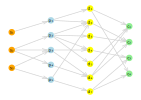

In [13]:
#3 entradas
#5 productores
#7 distribuidores
#4 consumidores

g = SimpleDiGraph(19);

node_names = ["s₁", "s₂", "s₃",
                 "p₁", "p₂", "p₃", "p₄", "p₅",
                 "d₁", "d₂", "d₃", "d₄", "d₅", "d₆", "d₇",
                 "c₁", "c₂", "c₃", "c₄"]

node_class = [1, 1, 1,
              2, 2, 2, 2, 2,
              3, 3, 3, 3, 3, 3, 3,
              4, 4, 4, 4]

node_name_idx = Dict(zip(node_names, 1:length(node_names)));
node_idx_name = Dict(zip(1:length(node_names), node_names));

add_edge!(g, node_name_idx["s₁"], node_name_idx["p₁"])
add_edge!(g, node_name_idx["s₂"], node_name_idx["p₂"])
add_edge!(g, node_name_idx["s₂"], node_name_idx["p₃"])
add_edge!(g, node_name_idx["s₂"], node_name_idx["p₄"])
add_edge!(g, node_name_idx["s₃"], node_name_idx["p₃"])
add_edge!(g, node_name_idx["s₃"], node_name_idx["p₅"])


add_edge!(g, node_name_idx["p₁"], node_name_idx["d₁"])
add_edge!(g, node_name_idx["p₁"], node_name_idx["d₂"])
add_edge!(g, node_name_idx["p₂"], node_name_idx["d₂"])
add_edge!(g, node_name_idx["p₂"], node_name_idx["d₃"])
add_edge!(g, node_name_idx["p₂"], node_name_idx["d₄"])
add_edge!(g, node_name_idx["p₂"], node_name_idx["d₅"])
add_edge!(g, node_name_idx["p₃"], node_name_idx["d₄"])
add_edge!(g, node_name_idx["p₃"], node_name_idx["d₆"])
add_edge!(g, node_name_idx["p₄"], node_name_idx["d₆"])
add_edge!(g, node_name_idx["p₅"], node_name_idx["d₂"])
add_edge!(g, node_name_idx["p₅"], node_name_idx["d₇"])

add_edge!(g, node_name_idx["d₁"], node_name_idx["c₁"])
add_edge!(g, node_name_idx["d₁"], node_name_idx["c₄"])
add_edge!(g, node_name_idx["d₂"], node_name_idx["c₂"])
add_edge!(g, node_name_idx["d₃"], node_name_idx["c₂"])
add_edge!(g, node_name_idx["d₄"], node_name_idx["c₃"])
add_edge!(g, node_name_idx["d₅"], node_name_idx["c₁"])
add_edge!(g, node_name_idx["d₆"], node_name_idx["c₁"])
add_edge!(g, node_name_idx["d₆"], node_name_idx["c₂"])
add_edge!(g, node_name_idx["d₇"], node_name_idx["c₃"])
add_edge!(g, node_name_idx["d₇"], node_name_idx["c₄"])

"""
Stage Graph
**Parameters**
*g*
a graph
*nlist*
Vector of Vector, Vector of node Vector for each stage.
*δ_x*
Distance between stages.
*δ_y*
Distance between nodes in a same stage.
**Examples**
```
julia> g = smallgraph(:karate)
julia> nlist = Array{Vector{Int}}(2)
julia> nlist[1] = [1:5]
julia> nlist[2] = [6:num_vertiecs(g)]
julia> locs_x, locs_y = shell_layout(g, nlist)
```
"""
function stage_layout(g, nlist::Union{Nothing, Vector{Vector{Int}}} = nothing, δ_x = 1.0, δ_y = 0.2)
    if nv(g) == 1
        return [0.0], [0.0]
    end
    if nlist == nothing
        nlist = [collect(1:nv(g))]
    end
    pos_x = 0.0
    if length(nlist[1]) > 1
        pos_x = 1.0
    end
    locs_x = Float64[]
    locs_y = Float64[]
    for nodes in nlist
        n = length(nodes)
        pos_y = range(-n*δ_y/2, stop=n*δ_y/2, length=n)
        append!(locs_y, pos_y)
        append!(locs_x, repeat([pos_x],n))
        pos_x += δ_x
    end
    return locs_x, locs_y
end

nlist = Vector{Vector{Int}}(undef, 4) # 4 shells
nlist[1] = 1:3 # first shell
nlist[2] = 4:8 # second shell
nlist[3] = 9:15 # first shell
nlist[4] = 16:nv(g) # second shell
locs_x, locs_y = stage_layout(g, nlist)

nodecolor = [colorant"orange", colorant"lightblue", colorant"yellow", colorant"lightgreen"]
nodefillc = nodecolor[node_class]


gplot(g, locs_x, locs_y, nodelabel=node_names, nodefillc = nodefillc)

# Algoritmo genético distribuido en GPU

El correcto funcionamiento y velocidad depende del uso de la memoria global dentro del GPU.

Dados $k$ trabajadores, se dividirá la tarea de cálculo de métrica de optimización, cruza y mutación.

1. Se inicializa la población $P$ con $n$ individuos. Cada individuo está representado por su cromosoma ($c_i$), y se inicializa con un número aleatorio $r_i \sim U[1,k]$.
2. Cada trabajador tiene un índice $j \in [1,k]$. El trabajador realiza las siguientes tareas sobre los individuos con un número aleatorio $r_i = j$:
 - Se calcula el desempeño del individuo $i$ para una métrica $m(c_1$).
 - Cada individuo se reproduce o no con una probabilidad proporcional a su desempeño en la métrica.
 - El cruce de aquellos individuos del trabajador que se consideran aptos para reproducirse se realiza con una permutación aleatoria de los seleccionados. Si es un número impar, se elimina el último de la permutación del pool.
 - Se realiza el cruce entre pares de individuos de la permutación aleatoria, realizando una mutación con probabilidad $p_m$.
 -  Los nuevos individuos reemplazan la subpoblación asignada al trabajador $j$
 -  El trabajador hace una nueva asignación de $r_i \sim U[1,k]$ para su subpoblación. Esta será la partición aleatoria de indivudos hacia trabajadores en la siguiente iteración.

3. Cada trabajador se asegura de que los cambios a cromosomas sean escritos a la memoria global. Cuando todos los trabajadores finalizan, se inicia la sigueinte iteración. La convergencia del algoritmo se calcula de manera individual por cada trabajador.

Este algoritmo es compatible con el muy conocido enfoque de islas para paralelización de algoritmos genéticos.

# Algoritmo de cúmulo de partículas distribuidos en el GPU

El correcto funcionamiento y velocidad depende del uso de la memoria global dentro del GPU, o de operaciones de broadcast entre los trabajadores. Las soluciones (partículas) podrán vivir en la memoria local del SM o en memoria global.

Dados $k$ trabajadores, se dividirá la simulación de las $i$ partículas en el algoritmo. Estas partículas se mantendrán como "propiedad" de su trabajador hasta el fin del algoritmo.

1. Cada trabajador realizará una inicialización aleatoria de posición de la solución en el panorama del dominio, así como la dirección de exploración en el mismo.
2. Se realizará el cálculo de fitness para cada solución.
3. Se almacenarán:
    - La mejor solución global por iteración. $X_b$
    - La métrica asociada a la mejor solución global.
    - La mejor solución personal (por cada partícula). $X_p$
    - La métrica asociada a la mejor solución personal (por cada partícula).
4. Se obtendrán las soluciones propuestas para la siguiente iteración utilizando la fórmula:

$$X_{t+1} = X_t + V_t$$

$$V_t = m \cdot V_{t-1} + c_1\cdot r_1 \cdot (X_p - X_t) + c_2 \cdot r_2 \cdot (X_b - X_t)$$

En lo cual $r_1$ y $r_2$ son v.i.i.d.s en un soporte $[0,1]$, y $m$, $c_1$ y $c_2$ son hiperparámetros constantes al algoritmo.

Estos pasos se repetirán hasta la convergencia.

# Algoritmo de cúmulo de partículas binario distribuido en el GPU

Las soluciones a un problema de optimización están representadas por un vector $k$-dimensional de soporte binario. A cada solución se le conocerá como una partícula, y esta se modificará iterativamente.

a) Se inicializará la partícula $X_i = [X_{i1}, X_{i2}, ...,  X_{ik}]$ aleatoriamente.

b) En cada it(eración, hasta el criterio de paro o la convergencia:

c) Se realizará el cálculo de la función a optimizar evaluada la partícula $X_i(t)$, $m(X_i(t))$. En caso de que se tenga un mejor desempeño que en alguna iteración anterior de esta partícula, se almacenará $Y_i = X_i(t)$ y $M_i = m(X_i(t))$.

d). Se obtendrá la mejor solución a nivel global entre todas las partículas, así como su evaluación: $Y_b$ y $M_b$.

e) Se obtendrán $V_i(t)$ y $X_{i}(t+1)$ de la siguiente forma:

$$V_i(t) = [V_{i1}(t), V_{i2}(t), ..., V_{ik}(t)]$$

$$V_{ij}(t) = \nu \cdot V_{ij}(t-1) + c_1 \cdot r_1 \cdot [Y_{ij} - X_{ij}(t)] + c_2 \cdot r_2 \cdot [Y_{bj} - X_{ij}(t)]$$

$$X_{ij}(t+1) = 
\begin{cases} 
      0 & \tilde{r} > S(V_{ij}(t)) \\
      1 & \tilde{r} \leq S(V_{ij}(t))
\end{cases}
$$

Donde $\nu$, $c_1$ y $c_2$ son constantes reales positivas, $r_1$, $r_2$ y $\tilde{r}$ son VAIID $\sim U_{[0,1]}$ y $S$ es la función sigmoide.


# Planteamiento del problema

## ¿Cómo representar el problema?

Se pueden abrir plantas y distribuidores.
Se concatenan en un vector binario.

#### Restricciones:
 - Existen $n(p)$ plantas máximas que se pueden abrir.
 - Existen $n(d)$ distribuidores máximos que se pueden abrir.
 - La capacidad de las plantas debe ser mayor o igual a la demanda de los consumidores.
 - La capacidad de los distribuidores debe ser mayor o igual a la demanda de los consumidores.
 
 Si alguna de estas se incumple, la solución se considera **inválida**. La penalización para una partícula inválida será su regeneración (hasta que se genere una solución válida).

#### Minimización:
 - Se desea minimizar el costo total de la operación, definido como el costo de la apertura de las aristas sumando al costo unitario de transporte entre aristas por la cantidad de producto que fluye por entre estas. Esto se plantea como un problema de optimización lineal en el cual se encuentra el costo del sistema mínimo que cumpla con las restricciones de demanda de los consumidores.

# CUDA

In [64]:
function random_particles_CUDA(k, n)
    CUDA.rand(Bool, (k,n))
end;

In [65]:
function metric_CUDA(X, W, M_t)
    idx = threadIdx().x
    features = size(X)[1]
    
    m = 0
    
    for i in 1:features
        m += X[i,idx] * W[i]
    end
    
    M_t[idx] = m
    
    return
end

metric_CUDA (generic function with 1 method)

In [66]:
X = random_particles_CUDA(k, n)

10×16 CuArray{Bool, 2}:
 1  0  0  1  1  1  0  0  0  1  1  0  0  0  0  1
 0  0  1  0  1  1  1  0  1  0  0  1  1  0  1  0
 1  1  1  1  1  1  0  1  0  0  0  0  0  0  0  0
 1  1  1  0  1  0  0  1  1  0  1  0  1  0  1  1
 1  1  1  0  0  1  1  0  0  1  1  1  1  1  0  0
 1  1  1  1  0  1  0  1  0  1  0  1  1  1  1  0
 0  0  1  0  1  0  1  1  0  0  1  1  0  1  1  1
 1  0  1  0  1  1  1  0  1  1  1  0  1  1  0  1
 1  1  0  0  1  1  1  0  1  0  0  1  1  1  1  1
 0  0  0  1  1  1  0  0  1  1  0  1  1  0  0  0

In [67]:
Y = similar(X)
copyto!(Y, X)

10×16 CuArray{Bool, 2}:
 1  0  0  1  1  1  0  0  0  1  1  0  0  0  0  1
 0  0  1  0  1  1  1  0  1  0  0  1  1  0  1  0
 1  1  1  1  1  1  0  1  0  0  0  0  0  0  0  0
 1  1  1  0  1  0  0  1  1  0  1  0  1  0  1  1
 1  1  1  0  0  1  1  0  0  1  1  1  1  1  0  0
 1  1  1  1  0  1  0  1  0  1  0  1  1  1  1  0
 0  0  1  0  1  0  1  1  0  0  1  1  0  1  1  1
 1  0  1  0  1  1  1  0  1  1  1  0  1  1  0  1
 1  1  0  0  1  1  1  0  1  0  0  1  1  1  1  1
 0  0  0  1  1  1  0  0  1  1  0  1  1  0  0  0

In [68]:
V = CUDA.zeros((k,n))

10×16 CuArray{Float32, 2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [69]:
W = CuArray([2.0 0.3 -1.0 -4.0 5.0 7.0 60.0 -1.0 -1000.0 9.0])

1×10 CuArray{Float64, 2}:
 2.0  0.3  -1.0  -4.0  5.0  7.0  60.0  -1.0  -1000.0  9.0

In [70]:
M = CUDA.zeros(n)

16-element CuArray{Float32, 1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [71]:
@cuda threads=n metric_CUDA(X, W, M);

In [72]:
M

16-element CuArray{Float32, 1}:
 -992.0
 -993.0
   66.3
   17.0
 -934.7
 -978.7
 -935.7
   62.0
 -995.7
   22.0
   62.0
 -918.7
 -983.7
 -929.0
 -936.7
 -943.0

In [73]:
M_t = CUDA.zeros(n);

In [74]:
function improvement_CUDA(M, M_t, X, Y)
    idx = threadIdx().x
    
    if M_t[idx] <= M[idx]
        return
    end
    
    M[idx] = M_t[idx]
    
    
    features = size(X)[1]
    
    for i in 1:features
        Y[i, idx] = X[i, idx]
    end
    
    return
end

improvement_CUDA (generic function with 1 method)

In [75]:
#@cuda threads=n improvement_CUDA(M, M_t, X, Y);

In [76]:
#M_b, M_bidx = findmax(M)

In [77]:
#M_bidx

In [78]:
function speed_candidates_CUDA(X, Y, V, M_bidx, ν, c_1, c_2)
    idx = threadIdx().x
    
    features = size(X)[1]
    
    for i in 1:features
        v = (ν * V[i, idx]) + (c_1 * rand() * (Y[i, idx] - X[i, idx])) + (c_2 * rand() * (Y[i, M_bidx] - X[i, idx]))

        X[i, idx] = rand() < 1/(1 + CUDA.exp(-v))
        V[i, idx] = v
    end
    
    return
end

speed_candidates_CUDA (generic function with 1 method)

In [ ]:
Y_b = NaN
M_b = NaN
M_bidx = NaN

for i in 1:iterations
    
    #Obtengo las métricas de las partículas
    @cuda threads=n metric_CUDA(X, W, M_t)

    #Actualizo las mejores métricas personales y actualizo las mejores soluciones personales
    @cuda threads=n improvement_CUDA(M, M_t, X, Y)
    
    #Encuentro la mejor métrica global así como su índice en M
    M_b, M_bidx = findmax(M)

    #Encuentro la velocidad (probabilidad de cero o uno) y propongo nuevos candidatos
    @cuda threads=n speed_candidates_CUDA(X, Y, V, M_bidx, ν, c_1, c_2)
    
    if i % 10 == 1
        print(M_b)
        print("\n")
    end
    #Pruebas de convergencia faltan
end

In [ ]:
M_b

In [ ]:
Y_b = Y[:,M_bidx]

In [ ]:
#Métrica de prueba. Obviamente la solución óptima es [1 1 0 0 1 1 1 0 0 1]